Welcome to my 2-way repeated measures ANOVA program.

Enter your csv file name (e.g. 'data.csv'). 
Please ensure that data is in long format before entering: 

data.csv
csv type file loaded in.

What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to perform and report an ANOVA

4

What was your dependent variable measured in?

ms.

What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
2


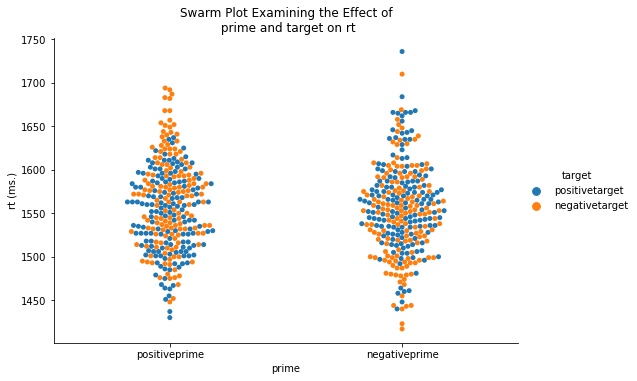

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.anova import AnovaRM
print('Welcome to my 2-way repeated measures ANOVA program.')
def load_data_function():
    global participant
    global data
    global IV1
    global IV2
    global DV
    global IV1_LVL1
    global IV1_LVL2
    global IV2_LVL1
    global IV2_LVL2
    file = input('''
Enter your csv file name (e.g. 'data.csv'). 
Please ensure that data is in long format before entering: 

''')
    if '.csv' in file:
        print('csv type file loaded in.')
        data = pd.read_csv(file)
        mapping = {data.columns[0]: 'Participant'}
        data = data.rename(columns=mapping)
        participant = data.columns[0]
        IV1 = data.columns[1]
        IV2 = data.columns[2]
        DV = data.columns[3]
        IV1_Dist = data[IV1].unique()
        IV2_Dist = data[IV2].unique()
        IV1_LVL1 = IV1_Dist[0]
        IV1_LVL2 = IV1_Dist[1]
        IV2_LVL1 = IV2_Dist[0]
        IV2_LVL2 = IV2_Dist[1]
    else:
        print('Invalid option, try again. Ensure data file is of csv type.')
        load_data_function_again()
def load_data_function_again():
    load_data_function()
load_data_function()  
def anova_function():
    options = input('''
What would you like to do with your data:
Enter 1 to view data frame
Enter 2 to tidy data
Enter 3 to generate summary statistics
Enter 4 to visualise the data
Enter 5 to execute and report an ANOVA

''')       
    if options == '1':
        print('Displaying Data Frame')
        display(data)
    elif options == '2':
        def tidy_data_function():
            global data
            global IV1
            global IV2
            global DV
            columns_levels = input('''
What would you like to tidy?
Enter 1 to rename the columns
Enter 2 to rename the levels
Enter b to go back

        ''')
            if columns_levels == '1':
                print('''
Ensure that you input the variables in the same order as your dataset.

''')
                IV1 = input('''
Enter your first independent variable: 

            ''')
                IV2 = input('''
Enter your second independent variable: 

            ''')
                DV = input('''
Enter your dependent variable: 
            
            ''')
                mapping = {data.columns[1]: IV1, data.columns[2]: IV2, data.columns[3]: DV}
                data = data.rename(columns=mapping)
            elif columns_levels == '2':
                def Which_IV_function():
                    global data
                    global IV1_LVL1
                    global IV1_LVL2
                    global IV2_LVL1
                    global IV2_LVL2
                    global new_IV1_LVL1
                    global new_IV1_LVL2
                    global new_IV2_LVL1
                    global new_IV2_LVL2
                    Which_IV = input('Which independent variable would you like to rename the levels of?\nEnter 1 to change the levels of ' + IV1 + '\nEnter 2 to change the levels of ' + IV2 + '\nEnter b to go back\n\n') 
                    if Which_IV == '1':
                        new_IV1_LVL1 = input('''
What would you like to rename your first level to?

''')
                        new_IV1_LVL2 = input('''
What would you like to rename your second level to?

''')
                        data = data.replace([IV1_LVL1],[new_IV1_LVL1])
                        data = data.replace([IV1_LVL2],[new_IV1_LVL2])
                        IV1_LVL1 = new_IV1_LVL1
                        IV1_LVL2 = new_IV1_LVL2
                    elif Which_IV == '2':
                        new_IV2_LVL1 = input('''
What would you like to rename your first level to?

''')
                        new_IV2_LVL2 = input('''
What would you like to rename your second level to?

''')
                        data = data.replace([IV2_LVL1],[new_IV2_LVL1])
                        data = data.replace([IV2_LVL2],[new_IV2_LVL2])
                        IV2_LVL1 = new_IV2_LVL1
                        IV2_LVL2 = new_IV2_LVL2
                    elif Which_IV == 'b':
                        tidy_data_function()
                    else:                            
                        print('Invalid option. Try again.')
                    Which_IV_function_again()
                def Which_IV_function_again():
                    Which_IV_function()
                Which_IV_function()
            elif columns_levels == 'b':
                anova_function()
            else:
                print('Invalid choice. Try again')
                tidy_data_function_again()
            def tidy_data_function_again():
                tidy_data_function()
            tidy_data_function_again()
        tidy_data_function()
    elif options == '3':
        print ('Displaying summary statistics')
        display(data.loc[:, data.columns!= participant].groupby([IV1,IV2]).aggregate([np.mean, np.std, np.median]))
    elif options == '4':
        DV_meas = input('''
What was your dependent variable measured in?

''')
        def visualisations_function():
            vis_type = input(
'''
What visualisation would you like to generate?

Categorical scatterplots:
    Enter 1 for a strip plot
    Enter 2 for a swarm plot

Categorical distribution plots:
    Enter 3 for a box plot
    Enter 4 for a violin plot
    Enter 5 for a boxen plot

Categorical estimate plots
    Enter 6 for a point plot
    Enter 7 for a bar plot

Enter b to go back
            
''')
            if vis_type == '1':
                vis_type = 'strip'
                ci=None
            elif vis_type == '2':
                vis_type = 'swarm'
                ci=None
            elif vis_type == '3':
                vis_type = 'box'
                ci=None
            elif vis_type == '4':
                vis_type = 'violin'
                ci=None
            elif vis_type == '5':
                vis_type = 'boxen'
                ci=None
            elif vis_type == '6':
                vis_type = 'point'
                ci = 30
            elif vis_type == '7':
                vis_type = 'bar'  
                ci = 100
            elif vis_type == 'b':
                anova_function()
            else:
                print('Invalid choice. Please try again.')
                visualisations_function_again()
            sns.catplot(x=IV1, y=DV, hue=IV2, data=data, kind=vis_type, ci=ci, aspect=1.5)
            plt.title(vis_type.title() + ' Plot Examining the Effect of\n ' + IV1 + ' and ' + IV2 + ' on ' + DV)
            plt.ylabel(DV + ' (' + DV_meas + ')')
            plt.show()
            visualisations_function_again()
        def visualisations_function_again():
            visualisations_function()   
        visualisations_function()  
    elif options == '5':
        print('Executing ANOVA')
        print(AnovaRM(data=data, depvar=DV, within=[IV1,IV2], subject=participant).fit())
        pairwise_comp = input(
'Would you like to carry out pairwise comparisons? y/n\n(Note these are only recommended when there is a significant interaction between ' + IV1 + ' and ' + IV2 + ')\n\n')
        if pairwise_comp == 'y':
            print('''
Executing pairwise comparisons:       
            ''')
            print('t-test result for ' + IV2_LVL1 + ' ' + IV2 + 's in ' + IV1_LVL1 + ' and ' + IV1_LVL2 + ' ' + IV1 + 's:')
            index = (data[IV1]==IV1_LVL1) & (data[IV2]==IV2_LVL1)
            PP = data[index][DV]
            index = (data[IV1]==IV1_LVL2) & (data[IV2]==IV2_LVL1)
            NP = data[index][DV]
            print(stats.ttest_rel(PP, NP))
            print('''
''')
            print('t-test result for ' + IV2_LVL2 + ' ' + IV2 + 's in ' + IV1_LVL1 + ' and ' + IV1_LVL2 + ' ' + IV1 + 's:')
            index = (data[IV1]==IV1_LVL1) & (data[IV2]==IV2_LVL2)
            PN = data[index][DV] 
            index = (data[IV1]==IV1_LVL2) & (data[IV2]==IV2_LVL2)
            NN = data[index][DV]
            print(stats.ttest_rel(PN, NN))
        elif pairwise_comp == 'n':
            anova_function()
    else:
        print('Invalid choice. Please try again.')
    anova_function_again()

def anova_function_again():
    anova_function()
    
anova_function()